In [1]:
#importing important packages necessary to notebook
import numpy as np
from sklearn.datasets import load_digits #ready available data set
from sklearn.model_selection import train_test_split  #function that divides up data
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt  #plotting
import seaborn as sns            #and visualization
import pandas as pd
import sklearn.cluster as cluster
%matplotlib inline

In [2]:
#styling notebook
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [3]:
#getting the data set
data_csv =  pd.read_csv("f444wstarR3.csv")
#list indices must be integers or slices, not float, error from below when tried to do floats
data_csv = data_csv.astype('int')
data_csv.head()
#type(data_csv) - is a dataframe

,xcentroid,ycentroid,area,semimajor_sigma,semiminor_sigma,orientation,eccentricity,min_value,max_value,local_background,R0_R3,R1_R3,R2_R3,gini,fwhm,cxx,cxy,cyy
0,6738,5478,5,0,0,0,0,0,0,0,0,0,0,0,0,12,0,12
1,4927,5392,5,0,0,0,0,0,0,0,0,0,0,0,1,2,0,2
2,6148,7557,12,0,0,16,0,2,4,0,0,0,0,0,2,1,0,1
3,8087,10942,5,0,0,-82,0,1,2,0,0,0,0,0,1,2,0,2
4,2946,3637,5,0,0,9,0,0,0,0,0,0,0,0,1,2,0,2


In [4]:
#seeing how many rows
#data_csv.xcentroid.value_counts()
#result: Name: xcentroid, Length: 17401, dtype: int64

#organize by area instead
data_csv.area.value_counts()
pd.set_option("display.max_rows", 10)  #can change the number to "None" to print all the values
print(data_csv.area.value_counts())

9        584
6        579
7        565
8        562
5        501
        ... 
1317       1
607        1
1114       1
816        1
39102      1
Name: area, Length: 1066, dtype: int64


In [5]:
print(data_csv.local_background.value_counts())

0    17401
Name: local_background, dtype: int64


In [6]:
#beyond the 2d visualization, umap helps see internal structure of the data, intuition
#need umap object
import umap

In [7]:
reducer = umap.UMAP()

In [8]:
#cleaning up data
#convert each feature into z-scores (number of standard deviations from the mean) for comparability
data = data_csv[
    [
        "xcentroid",  #remove
        "ycentroid",  #remove
        "area",
        "semimajor_sigma",
        "semiminor_sigma",
        "orientation", #remove, might use in future
        "eccentricity",
        "min_value",#re
        "max_value",#re
        "local_background",#re
        "R0_R3", #plotting values relative to R3 instead of R0
        "R1_R3",	
        "R2_R3",
        "gini",  #relative distribution of flux values - how much of the flux is in the brightest pixels
        "fwhm",
        "cxx",
        "cxy",
        "cyy"
    ]
].values
scaled_data = StandardScaler().fit_transform(data)

In [9]:
#training the reducer so it can learn about the manifold
#returns as array
embedding = reducer.fit_transform(scaled_data)
embedding.shape
#2d is the default

#running this changed the embedding slighly each time

# save numpy array as csv file
from numpy import asarray
from numpy import savetxt
# save to csv file
savetxt('r3.csv', embedding, delimiter=',')

## Attempting to plot without c, c=local bg and then area

Text(0.5, 1.0, 'UMAP projection of the dataset')

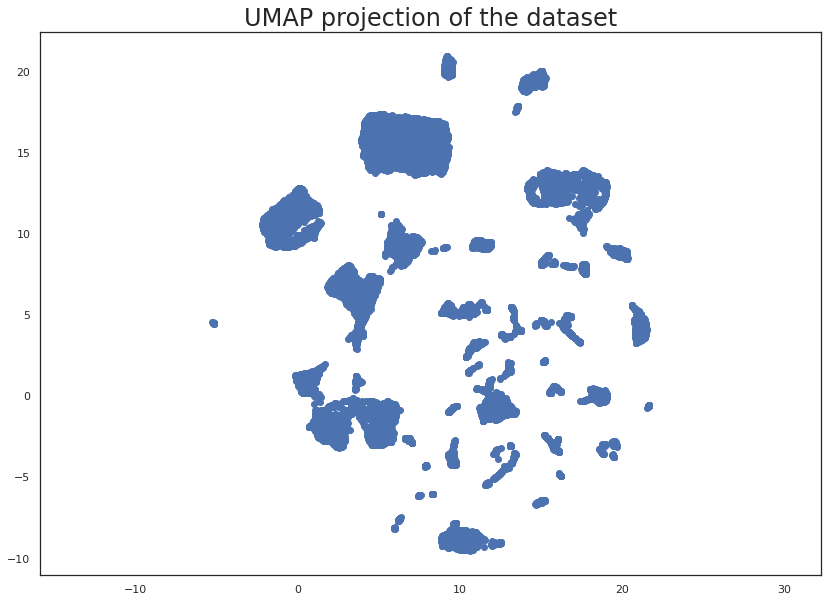

In [10]:
#what if i just ignore c...
#this is weird, how does it know what data i am talking about??
    #through the embedding
plt.scatter(
    embedding[:, 0],
    embedding[:, 1]
    #list indices must be integers or slices, not float
    #c=data_csv
   ) 
    
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the dataset', fontsize=24)


Text(0.5, 1.0, 'UMAP projection of the dataset with stars highlighted')

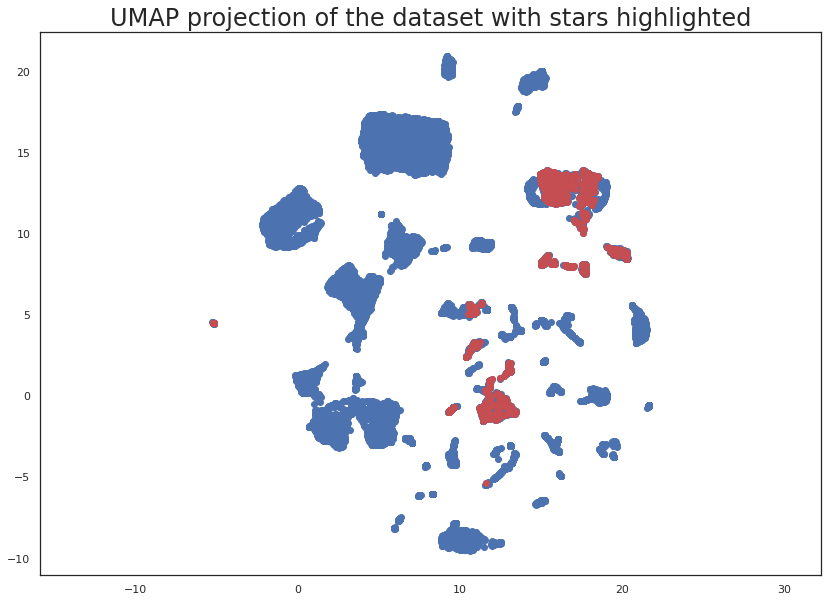

In [11]:
#what if i just ignore c...
#this is weird, how does it know what data i am talking about??
    #through the embedding
plt.scatter(
    embedding[:, 0],
    embedding[:, 1]
    #list indices must be integers or slices, not float
    #c=data_csv
   ) 
#this is attempting to plot out the stars, could just be the first 859 objects
#try running for less objects until in same cluster, in testing that, found that even the first 100 objects
#are not simply plotted together, they are also scattered
for i in range(859):
    plt.scatter(
        embedding[i,0],
        embedding[i, 1], color='r')
    
    
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the dataset with stars highlighted', fontsize=24)

#data got flipped in the reordering???

#get all in one cluster, to can automatically say what are stars

# Kmeans on umap projection

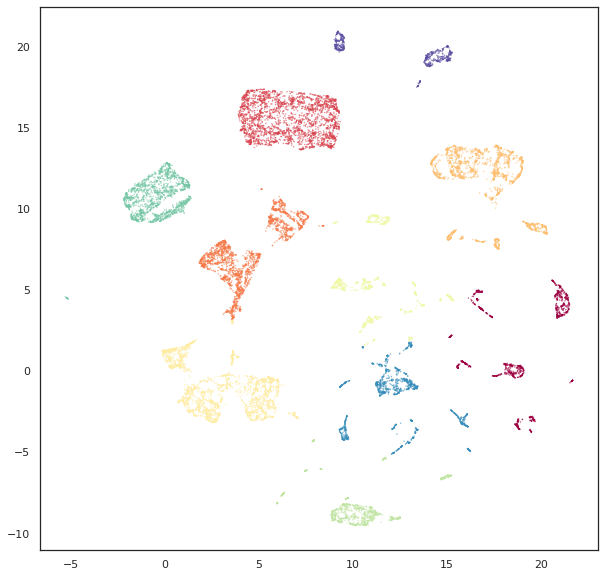

In [12]:
fig = plt.figure(figsize=(10,10))
#using 15 neighbors, changing this changed the coloring
kmeans_labels = cluster.KMeans(n_clusters=10).fit_predict(embedding) #scaled data is the reducer created
plt.scatter(embedding[:, 0], embedding[:, 1], c=kmeans_labels, s=0.1, cmap='Spectral');

#friends of friends algorithm
#minimal spanning tree - kruzkil method

In [15]:
#hopefully simpler before tackling area
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    #list indices must be integers or slices, not float
    c=[sns.color_palette()[x] for x in data_csv.local_background.map({"0":0})]) 
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the dataset', fontsize=24)

SyntaxError: invalid syntax (632552513.py, line 6)